In \[1\]:

    # Mount google drive
    from google.colab import drive
    drive.mount('/content/drive')

    Mounted at /content/drive

In \[6\]:

    import numpy as np
    import cv2 as cv
    import matplotlib.pyplot as plt

    coins = cv.imread('/content/drive/MyDrive/Image Processing EN3160/Coins/coins.png',cv.IMREAD_GRAYSCALE)
    assert coins is not None

    p = cv.imread('/content/drive/MyDrive/Image Processing EN3160/Coins/Penny.png',cv.IMREAD_GRAYSCALE)
    assert p is not None

    n = cv.imread('/content/drive/MyDrive/Image Processing EN3160/Coins/Nickel.png',cv.IMREAD_GRAYSCALE)
    assert n is not None

    d = cv.imread('/content/drive/MyDrive/Image Processing EN3160/Coins/Dime.png',cv.IMREAD_GRAYSCALE)
    assert d is not None

    q = cv.imread('/content/drive/MyDrive/Image Processing EN3160/Coins/Quarter.png',cv.IMREAD_GRAYSCALE)
    assert q is not None

    # Display the images
    plt.figure(figsize=(10,10))
    plt.subplot(1,5,1)
    plt.imshow(X = coins,cmap='gray')
    plt.title(label = 'Coins')
    plt.axis('off')

    plt.subplot(1,5,2)
    plt.imshow(X = p,cmap='gray')
    plt.title(label = 'Penny')
    plt.axis('off')

    plt.subplot(1,5,3)
    plt.imshow(X = n,cmap='gray')
    plt.title(label = 'Nickel')
    plt.axis('off')

    plt.subplot(1,5,4)
    plt.imshow( X = d,cmap='gray')
    plt.title(label = 'Dime')
    plt.axis('off')

    plt.subplot(1,5,5)
    plt.imshow(X = q,cmap='gray')
    plt.title(label = 'Quarter')
    plt.axis('off')

    plt.show()

    p_resp = cv.matchTemplate(coins,p,cv.TM_CCOEFF_NORMED)
    n_resp = cv.matchTemplate(coins,n,cv.TM_CCOEFF_NORMED)
    d_resp = cv.matchTemplate(coins,d,cv.TM_CCOEFF_NORMED)
    q_resp = cv.matchTemplate(coins,q,cv.TM_CCOEFF_NORMED)

    plt.figure(figsize=(10,10))
    plt.subplot(1,4,1)
    plt.imshow(X = p_resp,cmap='gray', vmin = 0, vmax = 1)
    plt.title(label = 'Penny')
    plt.axis('off')

    plt.subplot(1,4,2)
    plt.imshow(X = n_resp,cmap='gray', vmin = 0, vmax = 1)
    plt.title(label = 'Nickel')
    plt.axis('off')

    plt.subplot(1,4,3)
    plt.imshow(X = d_resp,cmap='gray', vmin = 0, vmax = 1)
    plt.title(label = 'Dime')
    plt.axis('off')

    plt.subplot(1,4,4)
    plt.imshow(X = q_resp,cmap='gray', vmin = 0, vmax = 1)
    plt.title(label = 'Quarter')
    plt.axis('off')

    plt.show()

    #Vertically staking the responses
    stacked = np.stack(arrays= [p_resp,n_resp,d_resp,q_resp],axis=2)

![No description has been provided for this
image](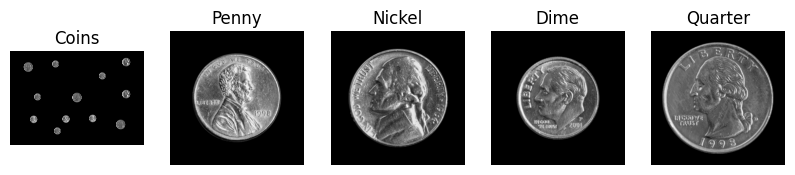%0A)

![No description has been provided for this
image](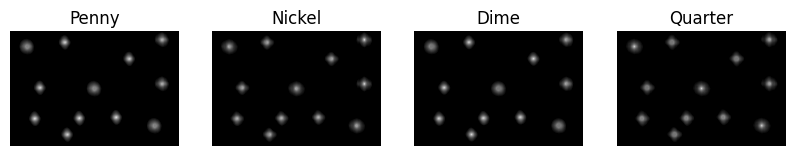%0A)

In \[9\]:

    from skimage.feature import peak_local_max

    pastel_colors = [
        (255,182,193), #pastel Pink
        (173,216,230), #pastel Blue
        (119,221,119), #pastel Green
        (253,253,150)  #pastel Yellow
    ]

    #Make a color image to draw on
    coins_color = cv.cvtColor(coins,cv.COLOR_GRAY2BGR)


    #Find local maxima
    coordinates = peak_local_max(stacked, exclude_border=0, min_distance=5,threshold_abs=0.8) # min_distance = minimum number of pixels separating adjacent maxima.
    #coordinate is a tuple containing the (row, column, channel)


    #plot on each color
    square_width = p.shape[0]
    coins_count=[]
    for i,coord in enumerate(coordinates):
        coins_count.append(coordinates[i][2]);
        c = coord[2]
        cv.rectangle(coins_color, (coord[1], coord[0]),  (coord[1] + square_width , coord[0]+ square_width), pastel_colors[c], 10)

    #creating a Legend
    coin_name = ["Penny","Nickel","Dime","Quarter"]
    for i, (name,color) in enumerate(zip(coin_name,pastel_colors)):
        p1 = (0,950+120*i) #Rectangle Starting points
        p2 = (100,1070+120*i) #Rectangle Ending points
        cv.rectangle(coins_color, p1,p2,color,-1)
        cv.putText(coins_color, name, (130,1040+120*i), cv.FONT_HERSHEY_SIMPLEX, 2.5, (255, 255, 255), 5, cv.LINE_AA)

    plt.imshow(X=coins_color)
    plt.axis('off')
    plt.show()

    for i, name in enumerate(coin_name):
        print("Number of " + name + " Coins = ", end =" ")
        print(coins_count.count(i))

![No description has been provided for this
image](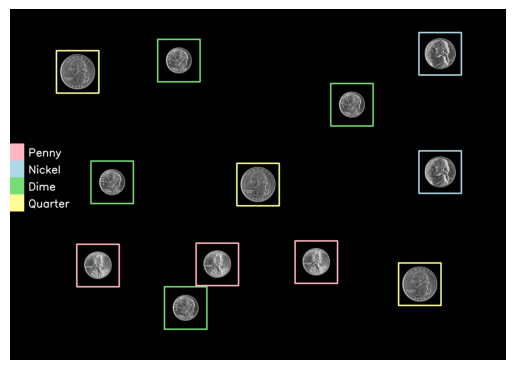%0A)

    Number of Penny Coins =  3
    Number of Nickel Coins =  2
    Number of Dime Coins =  4
    Number of Quarter Coins =  3

Penny = \$0.01

Nickel = \$0.05

Dime = \$0.10

Quarter = \$0.25

Total Amount = \$1.28

In \[ \]: